# Import Library

In [1]:
# Basic Library
import sys
import os

# Data management
import pandas as pd

# Local Library
sys.path.insert(1,'/Volumes/GoogleDrive-100434917563522594039/My Drive/Invitrace 2/Development/Utilis')
from utils import percent_countplot

# NLP Tools
from pythainlp.corpus.common import thai_stopwords
from pythainlp import word_tokenize
import re

# Visualization Tools
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'Tahoma' # Set to this font for visualizing Thai font
font_path = './font/THSarabunNew/THSarabunNew.ttf'

# Machine Learning Library
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
thai_stopwords_list = list(thai_stopwords())
print(len(thai_stopwords_list))
thai_stopwords_list[:10]

1030


['ทุกคน',
 'ทุกครา',
 'หมดกัน',
 'ทุกที่',
 'พวกกัน',
 'ที',
 'จัด',
 'แม้ว่า',
 'เช่นดังเก่า',
 'ที่ว่า']

In [3]:
# Set dataframe display
pd.set_option('display.max_columns', None)  # default = 20
# pd.set_option('display.expand_frame_repr', False) # default = True
pd.set_option('display.max_colwidth', None) # default = 50
# pd.set_option('display.max_rows', None) # default = 60
# pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import data from `PyThaiNLP `

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/PyThaiNLP/thai-sentiment-analysis-dataset/master/review_shopping.csv',
                sep='\t', names=['text', 'sentiment'])
df

,text,sentiment
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg
1,สินค้าด้อยคุณภาพ,neg
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ.กดใส่ตะกร้าไปเถอะ.เซ็งเรย,neg
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเตกนิดหน่อยไม่ว่าเเตกเยอะมาก ครั้งเดียวพอจบเเยก😢,neg
...,...,...
123,สินค้ามีตำหนิ แย่มากๆ ไม่ไหวๆเลย ถ้ามีตำหนิก็บอกด้วยครับ จะได้ทำใจก่อนซื้อ,neg
124,เปราะบางมากความแข็งแรงน้อย มันง่ายต่อการแตกหัก,neg
125,ขนส่งก็ช้าสินค้ามีตำหนิแพ็คสินค้าไม่ดีมีรอยบุบ,neg
126,สินค้าเหมือนของปลอม เนื่อครีมเหมือนซอง 10 บาท บรรจุภัณฑ์เหมือนก๊อปมา ไม่เหมือนของจริงในห้างเลย เสียดายตังค์ ซื้อมาทิ้ง,neg


# Define function

In [5]:
def text_process(text, remove_thai_stopwords = True):
    final = re.sub('\?|\.|;|:|\!|\"|ๆ|ฯ', '', text)
    final = word_tokenize(final)
    final = " ".join(final)
    if remove_thai_stopwords:
        final = " ".join(word for word in final.split() if word not in thai_stopwords_list)
    return final

def show_word_cloud(text, exclude_stopword = True):
    reg = r"[ก-๙a-zA-Z']+"
    font_path = './font/THSarabunNew/THSarabunNew.ttf'
    
    if exclude_stopword:
        thai_stopwords_list = list(thai_stopwords())
    else:
        thai_stopwords_list = []

    wordcloud = WordCloud(stopwords=thai_stopwords_list,
                          font_path=font_path, 
                          relative_scaling = 0.3,
                          min_font_size=1,
                          background_color="white",
                          width=2000,
                          height=1000,
                          max_words=2000, 
    #                       mask=mask,
                          colormap='plasma', 
                          scale=3,
                          font_step=4,
                          contour_width=3, 
                          contour_color='steelblue', 
    #                       collocations=False,
                          regexp=reg,
                          margin=2
                          ).generate(text)



    plt.figure(figsize = (16,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
    
    

# Exploratory Data Analysis (EDA)

<AxesSubplot:title={'center':'Distribution by sentiment'}, xlabel='sentiment', ylabel='Frequency'>

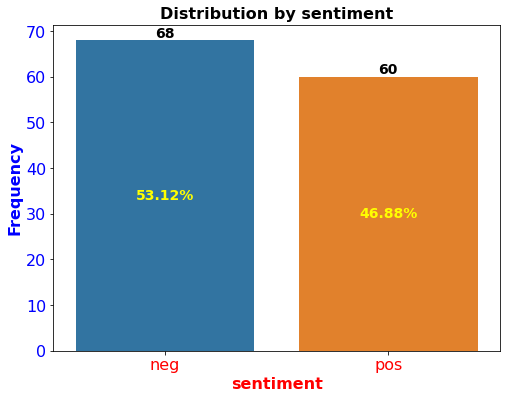

In [6]:
percent_countplot(df, col_name='sentiment', figsize=(8,6))

# Word Distribution in `Positive Sentiment `

# Word Distribution in `Negative Sentiment `

# Train Test Split

In [7]:
train, test = train_test_split(df, test_size=0.3, random_state=101, stratify = df['sentiment'])

train_idx = train.index
test_idx = test.index

# 1. Remove `thai_stopwords`

### Preprocessing Data

In [8]:
df['text_tokens'] = df['text'].apply(lambda x: text_process(x, remove_thai_stopwords=True))
df

,text,sentiment,text_tokens
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg,เกลียด ชอบ หลอก สั่งซื้อ ที่ไหนได้ ค้า
1,สินค้าด้อยคุณภาพ,neg,สินค้า ด้อย คุณภาพ
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ.กดใส่ตะกร้าไปเถอะ.เซ็งเรย,neg,สินค้า แจ้ง อะ กด ใส่ ตะกร้า เซ็ง เรย
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg,อย่า ทำ แบบนี้ แย่มาก
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเตกนิดหน่อยไม่ว่าเเตกเยอะมาก ครั้งเดียวพอจบเเยก😢,neg,เเบบ ผิดหวัง เเย่ ฝา เ เตก เ เตก เ เตก จบ เ เย ก😢
...,...,...,...
123,สินค้ามีตำหนิ แย่มากๆ ไม่ไหวๆเลย ถ้ามีตำหนิก็บอกด้วยครับ จะได้ทำใจก่อนซื้อ,neg,สินค้า มีตำหนิ แย่มาก ไหว มีตำหนิ ทำใจ ซื้อ
124,เปราะบางมากความแข็งแรงน้อย มันง่ายต่อการแตกหัก,neg,เปราะบาง ความแข็งแรง แตกหัก
125,ขนส่งก็ช้าสินค้ามีตำหนิแพ็คสินค้าไม่ดีมีรอยบุบ,neg,ขนส่ง สินค้า มีตำหนิ แพ็ค สินค้า ดี รอย บุบ
126,สินค้าเหมือนของปลอม เนื่อครีมเหมือนซอง 10 บาท บรรจุภัณฑ์เหมือนก๊อปมา ไม่เหมือนของจริงในห้างเลย เสียดายตังค์ ซื้อมาทิ้ง,neg,สินค้า เหมือน ของปลอม เนื่อ ครีม เหมือน ซอง 10 บาท บรรจุภัณฑ์ เหมือน ก๊อ ป เหมือน ของจริง ห้าง เสียดาย ตังค์ ซื้อ ทิ้ง


# Train Test Split

In [9]:
X_train = df[['text_tokens']].iloc[train_idx]
X_test = df[['text_tokens']].iloc[test_idx]
y_train = df['sentiment'].iloc[train_idx]
y_test = df['sentiment'].iloc[test_idx]
y_test.value_counts()

neg    21
pos    18
Name: sentiment, dtype: int64

# Feature Extraction

In [10]:
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
vocab_1 = dict(sorted(cvec.vocabulary_.items(), key=lambda x: x[1], reverse=True))
vocab_1

{'☺': 262,
 'ไหม้': 261,
 'ไห': 260,
 'ไว้ใจ': 259,
 'ไว': 258,
 'ไม่ต้อง': 257,
 'ได้ดี': 256,
 'ใส่': 255,
 'ใบเสร็จ': 254,
 'ใด': 253,
 'ใช้ไม่ได้': 252,
 'ใช้ได้': 251,
 'ใช้แล้ว': 250,
 'ใช้งาน': 249,
 'ใจดี': 248,
 'โอเค': 247,
 'โป๊ะ': 246,
 'โปร': 245,
 'โดยรวม': 244,
 'โฆษณา': 243,
 'โคตร': 242,
 'แห้ง': 241,
 'แสบ': 240,
 'แรง': 239,
 'แย่มาก': 238,
 'แย่': 237,
 'แพ๊': 236,
 'แพ้': 235,
 'แพ็ค': 234,
 'แพง': 233,
 'แพ': 232,
 'แป็บ': 231,
 'แบบนี้': 230,
 'แบต': 229,
 'แน่': 228,
 'แนะนำ': 227,
 'แถม': 226,
 'แตกหัก': 225,
 'แตก': 224,
 'แจ้ง': 223,
 'แข็งแรง': 222,
 'แกะ': 221,
 'เหี่ยว': 220,
 'เหมือนกับ': 219,
 'เหมือนกัน': 218,
 'เหมือน': 217,
 'เหมาะสม': 216,
 'เหมาะกับ': 215,
 'เสื้อ': 214,
 'เสียใจ': 213,
 'เสียเวลา': 212,
 'เสียเงิน': 211,
 'เสียดาย': 210,
 'เสียงดี': 209,
 'เสียง': 208,
 'เสียความรู้สึก': 207,
 'เล่น': 206,
 'เลือก': 205,
 'เรื่อง': 204,
 'เรียบร้อย': 203,
 'เรย': 202,
 'เย็บ': 201,
 'เยี่ยม': 200,
 'เป็นไป': 199,
 'เป็นแผล': 198,
 'เป็นอย่างมาก': 1

In [11]:
train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names(), index=X_train['text_tokens'])

,10,OK,กก,กด,กระทะ,กลิ่น,กล่อง,กางเกง,การทำงาน,การพิสูจน์,ก๊อ,ขนส่ง,ขนาดใหญ่,ของจริง,ของปลอม,ของแถม,ขาย,ข้างใน,ค,คดี,คน,ครีม,คละ,ความต้องการ,ความเปลี่ยนแปลง,ความเหมาะสม,คอ,คอม,คะแนนเต็ม,คับ,คาดหวัง,คืน,คืนเงิน,คุณภาพ,คุณภาพดี,คุ้ม,คุ้มค่า,ค้าส่ง,งาน,จ,จอ,จัดส่ง,จ่าย,ฉีกขาด,ฉุน,ชวย,ชอบ,ชัด,ชัดเจน,ชำรุด,ช๊อป,ซอง,ซา,ซื้อ,ซ้ำ,ดำ,ดี,ดีกว่า,ดีมาก,ดีแต่,ดู,ด้อย,ด้า,ตกใจ,ตอน,ตอนนี้,ตะกร้า,ตัง,ตังค์,ตัว,ตามกำหนด,ต่อไป,ต่ำ,ต้องการ,ต้องหา,ถูกใจ,ทนทาน,ทาน,ทำ,ทำอาหาร,ทิ้ง,ที่จับ,ที่หวัง,ท้องตลาด,นะคะ,นับว่า,นิ่ม,น่าประทับใจ,น้ำ,บรรจุภัณฑ์,บริการ,บอกต่อ,บาท,บิด,บุบ,ป,ปก,ประกายไฟ,ประกาศ,ปลอดภัย,ผิดพลาด,ผิดหวัง,ผ้า,พนักงาน,พนักงานบริการ,พอใจ,พัง,ภาพ,ภาพจริง,มองเห็น,มาด,มาถึง,มายัง,มีตำหนิ,มีปัญหา,มือ,มือใหม่,ย,ยกเลิก,ยอดเยี่ยม,ยี่ห้อ,ยุ่งยาก,ย่าง,รถ,รอ,รอบ,รอย,ระบบ,ระเบิด,รับประกัน,รับประทาน,รับผิดชอบ,ราคา,รายการ,รึเปล่า,รุ่น,รูป,รู้,รู้สึก,ร่างกาย,ร้อน,ร้อย,ร้า,ร้าน,ร้านค้า,ลบ,ละเอียด,ลา,ลูก,วจะ,วัสดุ,สภาพ,สม,สมราคา,สรุป,สวมใส่,สวย,สวยหรู,สะดวก,สั่ง,สั่งซื้อ,สั่งสินค้า,สาย,สิน,สินค้า,สิว,ส่งสินค้า,หนัง,หนา,หน้า,หน้าจอ,หน้าตึง,หมดอายุ,หลอก,หลายอย่าง,ห้าง,อธิบาย,อยู่ดี,อย่า,อะ,าา,เกรด,เคลียร์,เงิน,เงินได้,เจอ,เจ้า,เซ็กซี่,เซ็ง,เดิน,เดือน,เด็ก,เด้ง,เต็ม,เทียบ,เนื่อ,เนื้อผ้า,เป็นอย่างมาก,เป็นแผล,เป็นไป,เยี่ยม,เย็บ,เรย,เรียบร้อย,เรื่อง,เลือก,เล่น,เสียความรู้สึก,เสียง,เสียงดี,เสียดาย,เสียเงิน,เสียเวลา,เสียใจ,เสื้อ,เหมาะกับ,เหมาะสม,เหมือน,เหมือนกัน,เหมือนกับ,เหี่ยว,แกะ,แข็งแรง,แจ้ง,แตก,แตกหัก,แถม,แนะนำ,แน่,แบต,แบบนี้,แป็บ,แพ,แพง,แพ็ค,แพ้,แพ๊,แย่,แย่มาก,แรง,แสบ,แห้ง,โคตร,โฆษณา,โดยรวม,โปร,โป๊ะ,โอเค,ใจดี,ใช้งาน,ใช้แล้ว,ใช้ได้,ใช้ไม่ได้,ใด,ใบเสร็จ,ใส่,ได้ดี,ไม่ต้อง,ไว,ไว้ใจ,ไห,ไหม้,☺
text_tokens,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
สรุป แพง ท้องตลาด แย่มาก,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
แรง ดี หน้าจอ พอใจ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ผิดหวัง ลบ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ใช้แล้ว สิว เต็ม รู้ แพ้ รึเปล่า เซ็ง เสียดาย,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# Fit Model

In [12]:
lr_1 = LogisticRegression()
lr_1.fit(train_bow, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr_1.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.86      0.82      0.84        22
         pos       0.78      0.82      0.80        17

    accuracy                           0.82        39
   macro avg       0.82      0.82      0.82        39
weighted avg       0.82      0.82      0.82        39



In [14]:
y_test.value_counts()

neg    21
pos    18
Name: sentiment, dtype: int64

# Test Model

In [15]:
def predict_sentiment_1(text, lr):
    my_tokens = text_process(text, remove_thai_stopwords=True)
    my_bow = cvec.transform(pd.Series([my_tokens]))
    my_predictions = lr.predict(my_bow)
    return my_predictions

In [16]:
predict_sentiment_1('ส่งเร็วมาก', lr_1)

array(['neg'], dtype=object)

In [17]:
predict_sentiment_1('ส่งช้ามาก', lr_1)

array(['neg'], dtype=object)

# 2. Do not Remove `thai_stopwords`

### Preprocessing Data

In [18]:
df['text_tokens'] = df['text'].apply(lambda x: text_process(x, remove_thai_stopwords=False))
df

,text,sentiment,text_tokens
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg,เกลียด ชอบ หลอก ให้ สั่งซื้อ ที่ไหนได้ ไม่ มี สิ้น ค้า
1,สินค้าด้อยคุณภาพ,neg,สินค้า ด้อย คุณภาพ
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ.กดใส่ตะกร้าไปเถอะ.เซ็งเรย,neg,สินค้า หมด ทำไม ไม่ แจ้ง ขึ้น ว่า หมด อะ กด ใส่ ตะกร้า ไป เถอะ เซ็ง เรย
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg,อย่า ทำ แบบนี้ กับ ใคร อีก นะ ค่ะ แย่มาก ค่ะ
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเตกนิดหน่อยไม่ว่าเเตกเยอะมาก ครั้งเดียวพอจบเเยก😢,neg,คือ เเบบ ผิดหวัง มาก เเย่ ที่สุด ได้ ของ มา ฝา เ เตก เ เตก นิดหน่อย ไม่ ว่า เ เตก เยอะ มาก ครั้ง เดียว พอ จบ เ เย ก😢
...,...,...,...
123,สินค้ามีตำหนิ แย่มากๆ ไม่ไหวๆเลย ถ้ามีตำหนิก็บอกด้วยครับ จะได้ทำใจก่อนซื้อ,neg,สินค้า มีตำหนิ แย่มาก ไม่ ไหว เลย ถ้า มีตำหนิ ก็ บอก ด้วย ครับ จะ ได้ ทำใจ ก่อน ซื้อ
124,เปราะบางมากความแข็งแรงน้อย มันง่ายต่อการแตกหัก,neg,เปราะบาง มาก ความแข็งแรง น้อย มัน ง่าย ต่อ การ แตกหัก
125,ขนส่งก็ช้าสินค้ามีตำหนิแพ็คสินค้าไม่ดีมีรอยบุบ,neg,ขนส่ง ก็ ช้า สินค้า มีตำหนิ แพ็ค สินค้า ไม่ ดี มี รอย บุบ
126,สินค้าเหมือนของปลอม เนื่อครีมเหมือนซอง 10 บาท บรรจุภัณฑ์เหมือนก๊อปมา ไม่เหมือนของจริงในห้างเลย เสียดายตังค์ ซื้อมาทิ้ง,neg,สินค้า เหมือน ของปลอม เนื่อ ครีม เหมือน ซอง 10 บาท บรรจุภัณฑ์ เหมือน ก๊อ ป มา ไม่ เหมือน ของจริง ใน ห้าง เลย เสียดาย ตังค์ ซื้อ มา ทิ้ง


# Train Test Split

In [19]:
X_train = df[['text_tokens']].iloc[train_idx]
X_test = df[['text_tokens']].iloc[test_idx]
y_train = df['sentiment'].iloc[train_idx]
y_test = df['sentiment'].iloc[test_idx]
y_test.value_counts()

neg    21
pos    18
Name: sentiment, dtype: int64

# Feature Extraction

In [20]:
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
vocab_2 = dict(sorted(cvec.vocabulary_.items(), key=lambda x: x[1], reverse=True))
vocab_2

{'☺': 375,
 'ไหม้': 374,
 'ไห': 373,
 'ไว้ใจ': 372,
 'ไว้': 371,
 'ไว': 370,
 'ไม่ต้อง': 369,
 'ไม่ค่อย': 368,
 'ไม่': 367,
 'ไป': 366,
 'ได้รับ': 365,
 'ได้มา': 364,
 'ได้ดี': 363,
 'ได้': 362,
 'ให้': 361,
 'ใหม่': 360,
 'ใหญ่': 359,
 'ใส่': 358,
 'ใบเสร็จ': 357,
 'ใน': 356,
 'ใด': 355,
 'ใช้ไม่ได้': 354,
 'ใช้ได้': 353,
 'ใช้แล้ว': 352,
 'ใช้งาน': 351,
 'ใช้': 350,
 'ใช่': 349,
 'ใจดี': 348,
 'ใคร': 347,
 'โอเค': 346,
 'โป๊ะ': 345,
 'โปร': 344,
 'โดยรวม': 343,
 'โฆษณา': 342,
 'โคตร': 341,
 'แห้ง': 340,
 'แสบ': 339,
 'แล้ว': 338,
 'และ': 337,
 'แรง': 336,
 'แย่มาก': 335,
 'แย่': 334,
 'แม้แต่': 333,
 'แพ๊': 332,
 'แพ้': 331,
 'แพ็ค': 330,
 'แพง': 329,
 'แพ': 328,
 'แป็บ': 327,
 'แบบนี้': 326,
 'แบบ': 325,
 'แบต': 324,
 'แน่': 323,
 'แนะนำ': 322,
 'แท้': 321,
 'แถม': 320,
 'แต่': 319,
 'แตกหัก': 318,
 'แตก': 317,
 'แจ้ง': 316,
 'แข็งแรง': 315,
 'แกะ': 314,
 'เอา': 313,
 'เอง': 312,
 'เหี่ยว': 311,
 'เหลือ': 310,
 'เหมือนกับ': 309,
 'เหมือนกัน': 308,
 'เหมือน': 307,
 'เหมาะสม': 306,
 '

In [21]:
train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names(), index=X_train['text_tokens'])

,,10,OK,กก,กด,กระทะ,กลิ่น,กล่อง,กว่า,กัน,กับ,กางเกง,การทำงาน,การพิสูจน์,กำลังจะ,ก็,ก่อนหน้านี้,ก๊อ,ขนส่ง,ขนาดใหญ่,ขอ,ของ,ของจริง,ของปลอม,ของแถม,ขาด,ขาย,ขึ้น,ข้างใน,ค,คดี,คน,ครับ,ครั้ง,ครีม,คละ,ควร,ความ,ความต้องการ,ความเปลี่ยนแปลง,ความเหมาะสม,คอ,คอม,คะ,คะแนนเต็ม,คับ,คาดหวัง,คิด,คืน,คืนเงิน,คือ,คุณ,คุณภาพ,คุณภาพดี,คุ้ม,คุ้มค่า,ค่อนข้าง,ค่ะ,ค้าส่ง,งาน,ง่าย,จ,จริง,จอ,จะ,จัดส่ง,จาก,จ่าย,ฉีกขาด,ฉุน,ชวย,ชอบ,ชัด,ชัดเจน,ชำรุด,ช่วย,ช้า,ช๊อป,ซอง,ซะ,ซา,ซื้อ,ซ้ำ,ดำ,ดี,ดีกว่า,ดีมาก,ดีแต่,ดู,ด้วย,ด้อย,ด้า,ตกใจ,ตรง,ตลอด,ตอน,ตอนนี้,ตะกร้า,ตัง,ตังค์,ตัว,ตั้ง,ตาม,ตามกำหนด,ตามที่,ต่อ,ต่อไป,ต่ำ,ต้อง,ต้องการ,ต้องหา,ถูก,ถูกใจ,ทนทาน,ทัน,ทาน,ทำ,ทำอาหาร,ทำให้,ทำไม,ทิ้ง,ที่,ที่จับ,ที่หวัง,ท้องตลาด,นะ,นะคะ,นับว่า,นิ่ม,นี่,นี้,น่า,น่าจะ,น่าประทับใจ,น้ำ,บรรจุภัณฑ์,บริการ,บอกต่อ,บาท,บิด,บุบ,บ่อย,ป,ปก,ประกอบ,ประกายไฟ,ประกาศ,ปลอดภัย,ผิด,ผิดพลาด,ผิดหวัง,ผ้า,พนักงาน,พนักงานบริการ,พอใจ,พัง,ภาพ,ภาพจริง,มองเห็น,มัน,มา,มาก,มาด,มาถึง,มายัง,มี,มีตำหนิ,มีปัญหา,มือ,มือใหม่,ย,ยกเลิก,ยอดเยี่ยม,ยัง,ยี่ห้อ,ยุ่งยาก,ย่าง,รถ,รวดเร็ว,รอ,รอบ,รอย,ระบบ,ระเบิด,รับ,รับประกัน,รับประทาน,รับผิดชอบ,ราคา,รายการ,รึเปล่า,รุ่น,รูป,รู้,รู้สึก,ร่างกาย,ร้อน,ร้อย,ร้า,ร้าน,ร้านค้า,ลง,ลบ,ละ,ละเอียด,ลา,ลูก,วจะ,วัน,วัสดุ,ว่า,สบาย,สภาพ,สม,สมราคา,สรุป,สวมใส่,สวย,สวยหรู,สะดวก,สั่ง,สั่งซื้อ,สั่งสินค้า,สั้น,สาย,สำคัญ,สิน,สินค้า,สิว,สุด,ส่ง,ส่งสินค้า,หนัง,หนา,หน่อย,หน้า,หน้าจอ,หน้าตึง,หมด,หมดอายุ,หรือ,หลอก,หลาย,หลายอย่าง,ห้าง,อธิบาย,อยู่,อยู่ดี,อย่า,อย่าง,ออก,อะ,อะไร,อีก,อื่น,าา,เกรด,เกิน,เคย,เคลียร์,เงิน,เงินได้,เจอ,เจ้า,เซ็กซี่,เซ็ง,เดิน,เดียว,เดือน,เด็ก,เด้ง,เต็ม,เถอะ,เทียบ,เท่ากัน,เนื่อ,เนื้อผ้า,เป็น,เป็นอย่างมาก,เป็นแผล,เป็นไป,เพิ่ม,เพื่อ,เมื่อ,เยอะ,เยี่ยม,เย็บ,เรย,เรา,เรียบร้อย,เรื่อง,เร็ว,เลย,เลือก,เล็กน้อย,เล่น,เสีย,เสียความรู้สึก,เสียง,เสียงดี,เสียดาย,เสียเงิน,เสียเวลา,เสียใจ,เสื้อ,เหมาะกับ,เหมาะสม,เหมือน,เหมือนกัน,เหมือนกับ,เหลือ,เหี่ยว,เอง,เอา,แกะ,แข็งแรง,แจ้ง,แตก,แตกหัก,แต่,แถม,แท้,แนะนำ,แน่,แบต,แบบ,แบบนี้,แป็บ,แพ,แพง,แพ็ค,แพ้,แพ๊,แม้แต่,แย่,แย่มาก,แรง,และ,แล้ว,แสบ,แห้ง,โคตร,โฆษณา,โดยรวม,โปร,โป๊ะ,โอเค,ใคร,ใจดี,ใช่,ใช้,ใช้งาน,ใช้แล้ว,ใช้ได้,ใช้ไม่ได้,ใด,ใน,ใบเสร็จ,ใส่,ใหญ่,ใหม่,ให้,ได้,ได้ดี,ได้มา,ได้รับ,ไป,ไม่,ไม่ค่อย,ไม่ต้อง,ไว,ไว้,ไว้ใจ,ไห,ไหม้,☺
text_tokens,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
สรุป แพง กว่า ท้องตลาด คะ แย่มาก เสีย ความ,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
แรง ดี หน้าจอ ใหญ่ ส่ง ของ เร็ว พอใจ ครับ,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

# Fit Model

In [22]:
lr_2 = LogisticRegression()
lr_2.fit(train_bow, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr_2.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.95      0.91      0.93        22
         pos       0.89      0.94      0.91        17

    accuracy                           0.92        39
   macro avg       0.92      0.93      0.92        39
weighted avg       0.92      0.92      0.92        39



# Test Model

In [24]:
def predict_sentiment_2(text, lr):
    my_tokens = text_process(text,remove_thai_stopwords=False)
    my_bow = cvec.transform(pd.Series([my_tokens]))
    my_predictions = lr.predict(my_bow)
    return my_predictions

In [25]:
predict_sentiment_2('ส่งเร็วมาก', lr_2)

array(['pos'], dtype=object)

In [26]:
predict_sentiment_2('ส่งช้ามาก', lr_2)

array(['neg'], dtype=object)

In [27]:
text = 'ส่งเร็วมาก'
print(text_process(text, remove_thai_stopwords=False))
print(text_process(text, remove_thai_stopwords=True))

ส่ง เร็ว มาก



# Error Analysis

- จะสังเกตได้ว่า การ remove thai stopwords ออกไป มีผลทำให้ Performance drop ลงอย่างมาก

In [28]:
def extract_stopwords(text):
    final = re.sub('\?|\.|;|:|\!|\"|ๆ|ฯ', '', text)
    final = word_tokenize(final)
    final = " ".join(final)
    stopwords = " ".join(word for word in final.split() if word in thai_stopwords_list)
    return stopwords

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/PyThaiNLP/thai-sentiment-analysis-dataset/master/review_shopping.csv',
                sep='\t', names=['text', 'sentiment'])

df['text_tokens_still_stop'] = df['text'].apply(lambda x: text_process(x, remove_thai_stopwords=False))
df['text_tokens_remove_stop'] = df['text'].apply(lambda x: text_process(x, remove_thai_stopwords=True))
df['stopwords'] = df['text'].apply(extract_stopwords)
df

,text,sentiment,text_tokens_still_stop,text_tokens_remove_stop,stopwords
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg,เกลียด ชอบ หลอก ให้ สั่งซื้อ ที่ไหนได้ ไม่ มี สิ้น ค้า,เกลียด ชอบ หลอก สั่งซื้อ ที่ไหนได้ ค้า,ให้ ไม่ มี สิ้น
1,สินค้าด้อยคุณภาพ,neg,สินค้า ด้อย คุณภาพ,สินค้า ด้อย คุณภาพ,
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ.กดใส่ตะกร้าไปเถอะ.เซ็งเรย,neg,สินค้า หมด ทำไม ไม่ แจ้ง ขึ้น ว่า หมด อะ กด ใส่ ตะกร้า ไป เถอะ เซ็ง เรย,สินค้า แจ้ง อะ กด ใส่ ตะกร้า เซ็ง เรย,หมด ทำไม ไม่ ขึ้น ว่า หมด ไป เถอะ
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg,อย่า ทำ แบบนี้ กับ ใคร อีก นะ ค่ะ แย่มาก ค่ะ,อย่า ทำ แบบนี้ แย่มาก,กับ ใคร อีก นะ ค่ะ ค่ะ
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเตกนิดหน่อยไม่ว่าเเตกเยอะมาก ครั้งเดียวพอจบเเยก😢,neg,คือ เเบบ ผิดหวัง มาก เเย่ ที่สุด ได้ ของ มา ฝา เ เตก เ เตก นิดหน่อย ไม่ ว่า เ เตก เยอะ มาก ครั้ง เดียว พอ จบ เ เย ก😢,เเบบ ผิดหวัง เเย่ ฝา เ เตก เ เตก เ เตก จบ เ เย ก😢,คือ มาก ที่สุด ได้ ของ มา นิดหน่อย ไม่ ว่า เยอะ มาก ครั้ง เดียว พอ
...,...,...,...,...,...
123,สินค้ามีตำหนิ แย่มากๆ ไม่ไหวๆเลย ถ้ามีตำหนิก็บอกด้วยครับ จะได้ทำใจก่อนซื้อ,neg,สินค้า มีตำหนิ แย่มาก ไม่ ไหว เลย ถ้า มีตำหนิ ก็ บอก ด้วย ครับ จะ ได้ ทำใจ ก่อน ซื้อ,สินค้า มีตำหนิ แย่มาก ไหว มีตำหนิ ทำใจ ซื้อ,ไม่ เลย ถ้า ก็ บอก ด้วย ครับ จะ ได้ ก่อน
124,เปราะบางมากความแข็งแรงน้อย มันง่ายต่อการแตกหัก,neg,เปราะบาง มาก ความแข็งแรง น้อย มัน ง่าย ต่อ การ แตกหัก,เปราะบาง ความแข็งแรง แตกหัก,มาก น้อย มัน ง่าย ต่อ การ
125,ขนส่งก็ช้าสินค้ามีตำหนิแพ็คสินค้าไม่ดีมีรอยบุบ,neg,ขนส่ง ก็ ช้า สินค้า มีตำหนิ แพ็ค สินค้า ไม่ ดี มี รอย บุบ,ขนส่ง สินค้า มีตำหนิ แพ็ค สินค้า ดี รอย บุบ,ก็ ช้า ไม่ มี
126,สินค้าเหมือนของปลอม เนื่อครีมเหมือนซอง 10 บาท บรรจุภัณฑ์เหมือนก๊อปมา ไม่เหมือนของจริงในห้างเลย เสียดายตังค์ ซื้อมาทิ้ง,neg,สินค้า เหมือน ของปลอม เนื่อ ครีม เหมือน ซอง 10 บาท บรรจุภัณฑ์ เหมือน ก๊อ ป มา ไม่ เหมือน ของจริง ใน ห้าง เลย เสียดาย ตังค์ ซื้อ มา ทิ้ง,สินค้า เหมือน ของปลอม เนื่อ ครีม เหมือน ซอง 10 บาท บรรจุภัณฑ์ เหมือน ก๊อ ป เหมือน ของจริง ห้าง เสียดาย ตังค์ ซื้อ ทิ้ง,มา ไม่ ใน เลย มา


# Thai Stopwords distribution using in this Dataset

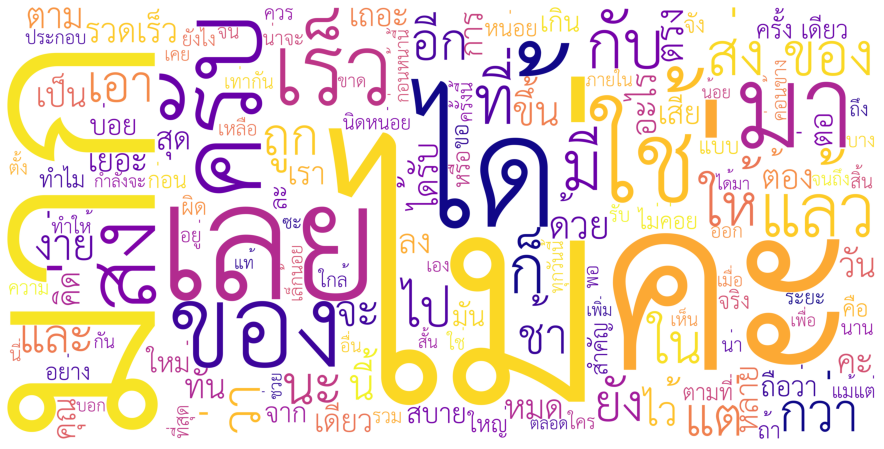

In [30]:
stop_word_all = " ".join(text for text in df['stopwords'])
show_word_cloud(stop_word_all, exclude_stopword = False)

- มี Negative word ที่ถูก remove ออกไป เนื่องจากเป็นคำที่อยู่ใน thai_stopwords เช่น หมด, ช้า, น้อย, ไม่ เป็นต้น ซึ่งส่งผลต่อการเรียนรู้ของ ML โดยตรง
- สาเหตุส่วนหนึ่งมาจาก การตัดคำที่อาจมีปัญหา เช่น "รายการไม่ดี ที่จับไม่ดีและสั้น" >>> tokenize >>> "รายการ ไม่ ดี ที่จับ ไม่ ดี และ สั้น" 
> คำว่า "ไม่ดี" ถูกแบ่งออก ให้เป็ฯคำว่า "ไม่" และ "ดี" ซึ่งเมื่อทำการ remove thai_stopwords ออก ส่งผลให้ คำว่า "ไม่" ออกไปด้วย และได้ประโยคสุดท้ายเป็น "รายการ ดี ที่จับ ดี" แทน
- 

# 3. Modify `thai_stopwords`

In [31]:
thai_stopwords_modify = list(thai_stopwords())
print(len(thai_stopwords_modify))
exclude_word = ['ไม่', 'หมด', 'ทำไม', 'มาก', 'เยอะ', 'ช้า', 'เร็ว','ส่ง']
# exclude_word = ['']
thai_stopwords_list = [word for word in thai_stopwords_modify if word not in exclude_word]
print(len(thai_stopwords_list))
thai_stopwords_list[:10]

1030
1022


['ทุกคน',
 'ทุกครา',
 'หมดกัน',
 'ทุกที่',
 'พวกกัน',
 'ที',
 'จัด',
 'แม้ว่า',
 'เช่นดังเก่า',
 'ที่ว่า']

In [32]:
print(thai_stopwords_list)

['ทุกคน', 'ทุกครา', 'หมดกัน', 'ทุกที่', 'พวกกัน', 'ที', 'จัด', 'แม้ว่า', 'เช่นดังเก่า', 'ที่ว่า', 'ถึง', 'ราย', 'บางครา', 'ครั้งหลัง', 'ไง', 'แห่งนี้', 'ลง', 'ครับ', 'ยก', 'กำหนด', 'เสียแล้ว', 'ซึ่ง', 'ถือ', 'นี้แหล่', 'มั้ยนะ', 'มากกว่า', 'มี', 'ดัง', 'ส่วนที่', 'ครานั้น', 'เสียยิ่งนัก', 'ดังเก่า', 'ง่าย', 'อย่าง', 'ที่แล้ว', 'เพราะว่า', 'เกี่ยวๆ', 'พบ', 'พวกที่', 'ขณะใด', 'เมื่อ', 'ภายหน้า', 'ยิ่งเมื่อ', 'คล้ายกับว่า', 'เป็นเพราะว่า', 'รวมถึง', 'ขณะหนึ่ง', 'ช่วย', 'คราวๆ', 'ช่วงท้าย', 'นับแต่นี้', 'เหลือเกิน', 'ต่าง', 'เช่นที่เคย', 'เรียก', 'จนเมื่อ', 'ที่ซึ่ง', 'เฉกเช่น', 'ก่อนหน้า', 'จวนเจียน', 'และ', 'ทว่า', 'อื่น', 'ใหญ่', 'เช่นใด', 'ยอม', 'ยืนยง', 'หรือไง', 'คราว', 'เหล่า', 'คล้ายว่า', 'เมื่อครั้งก่อน', 'น่ะ', 'นี่แน่ะ', 'อาจจะ', 'บอกแล้ว', 'ขึ้น', 'เท่าใด', 'สําหรับ', 'สู่', 'คล้าย', 'เสียยิ่ง', 'เพียงแต่', 'ยิ่งใหญ่', 'อย่างเดียว', 'ครั้งกระนั้น', 'กลุ่มๆ', 'จึงจะ', 'นับตั้งแต่', 'นอกจากนี้', 'ดั่งเคย', 'ช้าๆ', 'ข้างล่าง', 'ถึงแม้', 'ค่อยๆ', 'ยาว', 'เช่น', 'ผ่านๆ', 'ภายภาคหน้า

### Preprocessing Data

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/PyThaiNLP/thai-sentiment-analysis-dataset/master/review_shopping.csv',
                sep='\t', names=['text', 'sentiment'])

df['text_tokens'] = df['text'].apply(lambda x: text_process(x, remove_thai_stopwords=True))
df

,text,sentiment,text_tokens
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg,เกลียด ชอบ หลอก สั่งซื้อ ที่ไหนได้ ไม่ ค้า
1,สินค้าด้อยคุณภาพ,neg,สินค้า ด้อย คุณภาพ
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ.กดใส่ตะกร้าไปเถอะ.เซ็งเรย,neg,สินค้า หมด ทำไม ไม่ แจ้ง หมด อะ กด ใส่ ตะกร้า เซ็ง เรย
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg,อย่า ทำ แบบนี้ แย่มาก
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเตกนิดหน่อยไม่ว่าเเตกเยอะมาก ครั้งเดียวพอจบเเยก😢,neg,เเบบ ผิดหวัง มาก เเย่ ฝา เ เตก เ เตก ไม่ เ เตก เยอะ มาก จบ เ เย ก😢
...,...,...,...
123,สินค้ามีตำหนิ แย่มากๆ ไม่ไหวๆเลย ถ้ามีตำหนิก็บอกด้วยครับ จะได้ทำใจก่อนซื้อ,neg,สินค้า มีตำหนิ แย่มาก ไม่ ไหว มีตำหนิ ทำใจ ซื้อ
124,เปราะบางมากความแข็งแรงน้อย มันง่ายต่อการแตกหัก,neg,เปราะบาง มาก ความแข็งแรง แตกหัก
125,ขนส่งก็ช้าสินค้ามีตำหนิแพ็คสินค้าไม่ดีมีรอยบุบ,neg,ขนส่ง ช้า สินค้า มีตำหนิ แพ็ค สินค้า ไม่ ดี รอย บุบ
126,สินค้าเหมือนของปลอม เนื่อครีมเหมือนซอง 10 บาท บรรจุภัณฑ์เหมือนก๊อปมา ไม่เหมือนของจริงในห้างเลย เสียดายตังค์ ซื้อมาทิ้ง,neg,สินค้า เหมือน ของปลอม เนื่อ ครีม เหมือน ซอง 10 บาท บรรจุภัณฑ์ เหมือน ก๊อ ป ไม่ เหมือน ของจริง ห้าง เสียดาย ตังค์ ซื้อ ทิ้ง


# Train Test Split

In [34]:
X_train = df[['text_tokens']].iloc[train_idx]
X_test = df[['text_tokens']].iloc[test_idx]
y_train = df['sentiment'].iloc[train_idx]
y_test = df['sentiment'].iloc[test_idx]
y_test.value_counts()

neg    21
pos    18
Name: sentiment, dtype: int64

# Feature Extraction

In [35]:
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
vocab_2 = dict(sorted(cvec.vocabulary_.items(), key=lambda x: x[1], reverse=True))
vocab_2

{'☺': 270,
 'ไหม้': 269,
 'ไห': 268,
 'ไว้ใจ': 267,
 'ไว': 266,
 'ไม่ต้อง': 265,
 'ไม่': 264,
 'ได้ดี': 263,
 'ใส่': 262,
 'ใบเสร็จ': 261,
 'ใด': 260,
 'ใช้ไม่ได้': 259,
 'ใช้ได้': 258,
 'ใช้แล้ว': 257,
 'ใช้งาน': 256,
 'ใจดี': 255,
 'โอเค': 254,
 'โป๊ะ': 253,
 'โปร': 252,
 'โดยรวม': 251,
 'โฆษณา': 250,
 'โคตร': 249,
 'แห้ง': 248,
 'แสบ': 247,
 'แรง': 246,
 'แย่มาก': 245,
 'แย่': 244,
 'แพ๊': 243,
 'แพ้': 242,
 'แพ็ค': 241,
 'แพง': 240,
 'แพ': 239,
 'แป็บ': 238,
 'แบบนี้': 237,
 'แบต': 236,
 'แน่': 235,
 'แนะนำ': 234,
 'แถม': 233,
 'แตกหัก': 232,
 'แตก': 231,
 'แจ้ง': 230,
 'แข็งแรง': 229,
 'แกะ': 228,
 'เหี่ยว': 227,
 'เหมือนกับ': 226,
 'เหมือนกัน': 225,
 'เหมือน': 224,
 'เหมาะสม': 223,
 'เหมาะกับ': 222,
 'เสื้อ': 221,
 'เสียใจ': 220,
 'เสียเวลา': 219,
 'เสียเงิน': 218,
 'เสียดาย': 217,
 'เสียงดี': 216,
 'เสียง': 215,
 'เสียความรู้สึก': 214,
 'เล่น': 213,
 'เลือก': 212,
 'เร็ว': 211,
 'เรื่อง': 210,
 'เรียบร้อย': 209,
 'เรย': 208,
 'เย็บ': 207,
 'เยี่ยม': 206,
 'เยอะ': 205,
 'เป็นไป':

In [36]:
train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names(), index=X_train['text_tokens'])

,10,OK,กก,กด,กระทะ,กลิ่น,กล่อง,กางเกง,การทำงาน,การพิสูจน์,ก๊อ,ขนส่ง,ขนาดใหญ่,ของจริง,ของปลอม,ของแถม,ขาย,ข้างใน,ค,คดี,คน,ครีม,คละ,ความต้องการ,ความเปลี่ยนแปลง,ความเหมาะสม,คอ,คอม,คะแนนเต็ม,คับ,คาดหวัง,คืน,คืนเงิน,คุณภาพ,คุณภาพดี,คุ้ม,คุ้มค่า,ค้าส่ง,งาน,จ,จอ,จัดส่ง,จ่าย,ฉีกขาด,ฉุน,ชวย,ชอบ,ชัด,ชัดเจน,ชำรุด,ช้า,ช๊อป,ซอง,ซา,ซื้อ,ซ้ำ,ดำ,ดี,ดีกว่า,ดีมาก,ดีแต่,ดู,ด้อย,ด้า,ตกใจ,ตอน,ตอนนี้,ตะกร้า,ตัง,ตังค์,ตัว,ตามกำหนด,ต่อไป,ต่ำ,ต้องการ,ต้องหา,ถูกใจ,ทนทาน,ทาน,ทำ,ทำอาหาร,ทำไม,ทิ้ง,ที่จับ,ที่หวัง,ท้องตลาด,นะคะ,นับว่า,นิ่ม,น่าประทับใจ,น้ำ,บรรจุภัณฑ์,บริการ,บอกต่อ,บาท,บิด,บุบ,ป,ปก,ประกายไฟ,ประกาศ,ปลอดภัย,ผิดพลาด,ผิดหวัง,ผ้า,พนักงาน,พนักงานบริการ,พอใจ,พัง,ภาพ,ภาพจริง,มองเห็น,มาก,มาด,มาถึง,มายัง,มีตำหนิ,มีปัญหา,มือ,มือใหม่,ย,ยกเลิก,ยอดเยี่ยม,ยี่ห้อ,ยุ่งยาก,ย่าง,รถ,รอ,รอบ,รอย,ระบบ,ระเบิด,รับประกัน,รับประทาน,รับผิดชอบ,ราคา,รายการ,รึเปล่า,รุ่น,รูป,รู้,รู้สึก,ร่างกาย,ร้อน,ร้อย,ร้า,ร้าน,ร้านค้า,ลบ,ละเอียด,ลา,ลูก,วจะ,วัสดุ,สภาพ,สม,สมราคา,สรุป,สวมใส่,สวย,สวยหรู,สะดวก,สั่ง,สั่งซื้อ,สั่งสินค้า,สาย,สิน,สินค้า,สิว,ส่ง,ส่งสินค้า,หนัง,หนา,หน้า,หน้าจอ,หน้าตึง,หมด,หมดอายุ,หลอก,หลายอย่าง,ห้าง,อธิบาย,อยู่ดี,อย่า,อะ,าา,เกรด,เคลียร์,เงิน,เงินได้,เจอ,เจ้า,เซ็กซี่,เซ็ง,เดิน,เดือน,เด็ก,เด้ง,เต็ม,เทียบ,เนื่อ,เนื้อผ้า,เป็นอย่างมาก,เป็นแผล,เป็นไป,เยอะ,เยี่ยม,เย็บ,เรย,เรียบร้อย,เรื่อง,เร็ว,เลือก,เล่น,เสียความรู้สึก,เสียง,เสียงดี,เสียดาย,เสียเงิน,เสียเวลา,เสียใจ,เสื้อ,เหมาะกับ,เหมาะสม,เหมือน,เหมือนกัน,เหมือนกับ,เหี่ยว,แกะ,แข็งแรง,แจ้ง,แตก,แตกหัก,แถม,แนะนำ,แน่,แบต,แบบนี้,แป็บ,แพ,แพง,แพ็ค,แพ้,แพ๊,แย่,แย่มาก,แรง,แสบ,แห้ง,โคตร,โฆษณา,โดยรวม,โปร,โป๊ะ,โอเค,ใจดี,ใช้งาน,ใช้แล้ว,ใช้ได้,ใช้ไม่ได้,ใด,ใบเสร็จ,ใส่,ได้ดี,ไม่,ไม่ต้อง,ไว,ไว้ใจ,ไห,ไหม้,☺
text_tokens,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
สรุป แพง ท้องตลาด แย่มาก,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
แรง ดี หน้าจอ ส่ง เร็ว พอใจ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ผิดหวัง ลบ ไม่,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
ใช้แล้ว สิว เต็ม ไม่ รู้ แพ้ รึเปล่า เซ็ง เยอะ เสียดาย มาก,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,

# Fit Model

In [37]:
lr_3 = LogisticRegression()
lr_3.fit(train_bow, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr_3.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.95      0.91      0.93        22
         pos       0.89      0.94      0.91        17

    accuracy                           0.92        39
   macro avg       0.92      0.93      0.92        39
weighted avg       0.92      0.92      0.92        39



# Test Model

In [39]:
def predict_sentiment_3(text, lr):
    my_tokens = text_process(text,remove_thai_stopwords=True)
    my_bow = cvec.transform(pd.Series([my_tokens]))
    my_predictions = lr.predict(my_bow)
    return my_predictions

In [40]:
predict_sentiment_3('ส่งเร็วมาก', lr_3)

array(['pos'], dtype=object)

In [41]:
predict_sentiment_3('ส่งช้ามาก', lr_3)

array(['pos'], dtype=object)

In [42]:
text = 'ส่งเร็วมาก'
print(text_process(text, remove_thai_stopwords=False))
print(text_process(text, remove_thai_stopwords=True))

ส่ง เร็ว มาก
ส่ง เร็ว มาก


# Summary
- เมื่อทำการปรับ stopword แล้วพบว่า experiment 3 สามารถให้ค่า Performance กลับมาได้เท่ากับ experiment 2 แล้ว แต่ยังมีปัญหาเรื่องการ generalize อยู่ ในขั้นตอนของ Test Model ที่จะยังให้ผลการ predict เป็น pos สำหรับ negative sentiment อยู่ กล่าวคือ อาจจะต้องมีการตัด stopword บางคัวออกไปอีก
- จะเห็นได้ว่า ใน context ของแต่ละโจทย์ ก็อาจจะต้องมีการปรับแต่ง stopword ให้เหมาะสม ตามแต่ละธุรกิจไปด้วย

# Source Inspired by
- https://karnyong.medium.com/เขียน-python-สร้างแบบจำลองการวิเคราะห์รู้สึก-sentiment-analysis-สำหรับภาษาไทย-cdb43de08e9a

# Credit technical
- https://www.bualabs.com/archives/2996/word-cloud-thai-language-python-matplotlib-mask/